
----------------------------------------
SCENARIO: Test 1
Parameters: a=1, b=2, c=3, d=1
Determinant Δ = -5.00
→ One unique equilibrium point: (0, 0)
Jacobian matrix:
 [[1 2]
 [3 1]]
Eigenvalues: [ 3.44948974 -1.44948974]
→ Saddle point: one stable and one unstable direction (unstable).

Time points: 500 | Final state: x=413735098909236647698158845952.000, y=506719940503779732599013900288.000


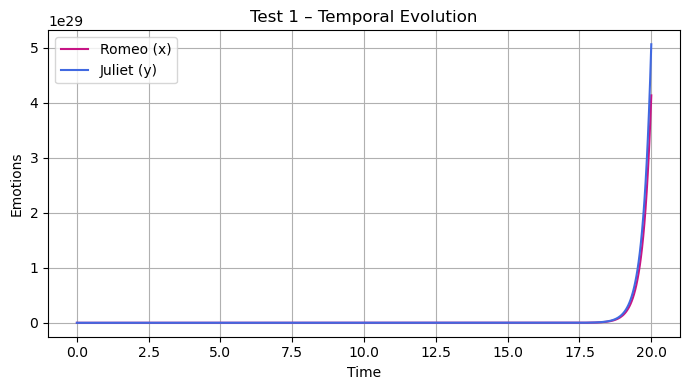


----------------------------------------
SCENARIO: Test 2
Parameters: a=0, b=2, c=-2, d=0
Determinant Δ = 4.00
→ One unique equilibrium point: (0, 0)
Jacobian matrix:
 [[ 0  2]
 [-2  0]]
Eigenvalues: [0.+2.j 0.-2.j]
→ Center: neutral oscillations (real parts equal zero).

Time points: 500 | Final state: x=0.031, y=-0.706


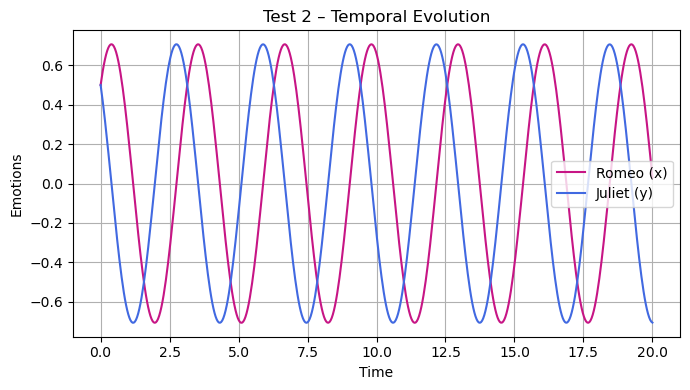


----------------------------------------
SCENARIO: Test 3
Parameters: a=0, b=0, c=0, d=0
Determinant Δ = 0.00
→ Infinite or no equilibrium points (det(A)=0).
Jacobian matrix:
 [[0 0]
 [0 0]]
Eigenvalues: [0. 0.]

Time points: 500 | Final state: x=0.500, y=0.500


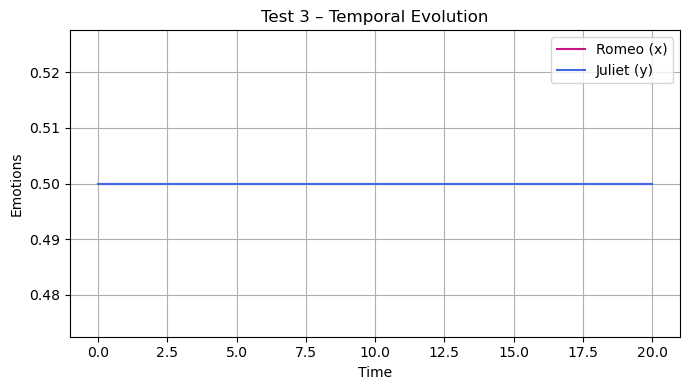


----------------------------------------
SCENARIO: Test 4
Parameters: a=-0.5, b=2, c=-2, d=-0.5
Determinant Δ = 4.25
→ One unique equilibrium point: (0, 0)
Jacobian matrix:
 [[-0.5  2. ]
 [-2.  -0.5]]
Eigenvalues: [-0.5+2.j -0.5-2.j]
→ Stable spiral: trajectories spiral inward toward equilibrium.

Time points: 500 | Final state: x=0.000, y=-0.000


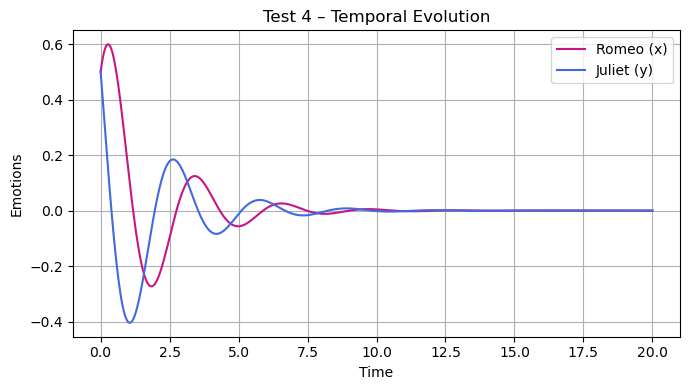


----------------------------------------
SCENARIO: Test 5
Parameters: a=-1, b=1, c=1, d=-1
Determinant Δ = 0.00
→ Infinite or no equilibrium points (det(A)=0).
Jacobian matrix:
 [[-1  1]
 [ 1 -1]]
Eigenvalues: [ 0. -2.]
→ Saddle point: one stable and one unstable direction (unstable).

Time points: 500 | Final state: x=0.500, y=0.500


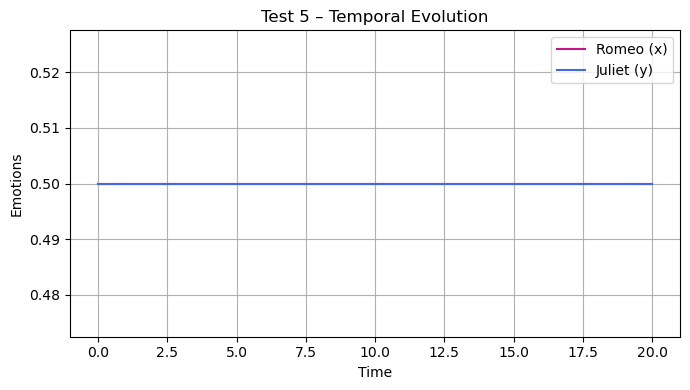


Simulation completed for all scenarios.


In [6]:
# -----------------------------------------------------------
# MODELING ROMEO AND JULIET'S RELATIONSHIP – LINEAR MODEL
# -----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------------------------------------
# STEP 1 – DEFINE THE MODEL
# -----------------------------------------------------------

def system(t, variables, a, b, c, d):
    """Linear system: emotional dynamics of Romeo and Juliet"""
    x, y = variables
    dxdt = a * x + b * y
    dydt = c * x + d * y
    return [dxdt, dydt]


# -----------------------------------------------------------
# STEP 2 – DEFINE SCENARIOS (PARAMETERS)
# -----------------------------------------------------------

scenarios = {
    "Test 1": (1, 2, 3, 1),
    "Test 2": (0, 2, -2, 0),
    "Test 3": (0, 0, 0, 0),
    "Test 4": (-0.5, 2, -2, -0.5),
    "Test 5": (-1, 1, 1, -1)
}


# -----------------------------------------------------------
# STEP 3 – LOOP THROUGH SCENARIOS
# -----------------------------------------------------------

for name, (a, b, c, d) in scenarios.items():
    print("\n----------------------------------------")
    print(f"SCENARIO: {name}")
    print(f"Parameters: a={a}, b={b}, c={c}, d={d}")

    # --- Determinant and equilibrium
    delta = a * d - b * c
    print(f"Determinant Δ = {delta:.2f}")

    if delta != 0:
        print("→ One unique equilibrium point: (0, 0)")
    else:
        print("→ Infinite or no equilibrium points (det(A)=0).")

    # --- Jacobian matrix
    J = np.array([[a, b], [c, d]])
    print("Jacobian matrix:\n", J)

    # -----------------------------------------------------------
    # STEP 4 – STABILITY ANALYSIS
    # -----------------------------------------------------------
    eigenvalues, eigenvectors = np.linalg.eig(J)
    print("Eigenvalues:", eigenvalues)

    if np.isreal(eigenvalues).all():  # both real
        if np.sign(eigenvalues[0]) == np.sign(eigenvalues[1]):
            if np.all(eigenvalues < 0):
                print("→ Stable node: trajectories converge toward equilibrium.")
            elif np.all(eigenvalues > 0):
                print("→ Unstable node: trajectories move away from equilibrium.")
        else:
            print("→ Saddle point: one stable and one unstable direction (unstable).")

    else:  # complex eigenvalues
        real_part = np.real(eigenvalues[0])
        if real_part < 0:
            print("→ Stable spiral: trajectories spiral inward toward equilibrium.")
        elif real_part > 0:
            print("→ Unstable spiral: trajectories spiral outward away from equilibrium.")
        else:
            print("→ Center: neutral oscillations (real parts equal zero).")

    # -----------------------------------------------------------
    # STEP 5 – NUMERICAL SIMULATION
    # -----------------------------------------------------------
    x0, y0 = 0.5, 0.5  # initial emotions
    t_span = (0, 20)
    t_eval = np.linspace(*t_span, 500)

    sol = solve_ivp(system, t_span, [x0, y0], args=(a, b, c, d), t_eval=t_eval)

    # Optional print of numerical results
    print(f"\nTime points: {len(sol.t)} | Final state: x={sol.y[0, -1]:.3f}, y={sol.y[1, -1]:.3f}")

    # -----------------------------------------------------------
    # STEP 6 – PLOT TEMPORAL EVOLUTION
    # -----------------------------------------------------------
    plt.figure(figsize=(7, 4))
    plt.plot(sol.t, sol.y[0], label="Romeo (x)", color='mediumvioletred')
    plt.plot(sol.t, sol.y[1], label="Juliet (y)", color='royalblue')

    plt.xlabel("Time")
    plt.ylabel("Emotions")
    plt.title(f"{name} – Temporal Evolution")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\nSimulation completed for all scenarios.")

